In [1]:
all_data = readRDS('../processed_data/single_cell//stats_input_data_0825.rds')


In [2]:
colors = readRDS('..//processed_data//Cell_group_colors.rds')

In [7]:
library(reshape2)
library(ggplot2)

g = c('CPT1B', 'CPT1C', 'ACACA', 'ACACB', 'HADHA')
options(repr.plot.width=5, repr.plot.height=8)
x = melt(all_data$av_logcounts_by_celltype[rownames(all_data$av_logcounts_by_celltype)%in%g,])

x$Var1 <- factor(x$Var1, levels = sort(as.character(unique(x$Var1))))
x$Var2 = factor(x$Var2, levels = c('Ex', 'In', 'Ast', 'Mic', 'Oli', 'Opc'))

pdf('../pdf_figures/beta_ox_exp_counts.pdf', width=5, height=8)
ggplot(x, aes(x = Var1, y = value, fill = Var2)) +
  geom_bar(stat = "identity",  position = "dodge", width=.8) +
  coord_flip()+
  labs(title = "Gene Expression Levels (Ascending Order)",
       x = "",
       y = "average log-expression per cell type") +
  theme_minimal() + scale_fill_manual(values = colors[unique(as.character(x$Var2))]) 

dev.off()

png 
  2

In [86]:
g = c('CPT1B', 'CPT1C', 'ACACA', 'ACACB', 'HADHA')

In [9]:
options(repr.plot.width=5, repr.plot.height=8)
x = melt(all_data$det.rate.celltype[rownames(all_data$det.rate.celltype)%in%g,])

x$Var1 <- factor(x$Var1, levels = sort(as.character(unique(x$Var1))))
x$Var2 = factor(x$Var2, levels = c('Ex', 'In', 'Ast', 'Mic', 'Oli', 'Opc'))

pdf('../pdf_figures/beta_ox_exp_det.pdf', width=5, height=8)

ggplot(x, aes(x = Var1, y = value, fill = Var2)) +
  geom_bar(stat = "identity",  position = "dodge", width=.8) +
  geom_hline(yintercept = 0.1, color = "red", linetype = "dashed", size = 1) + coord_flip()+
  labs(title = "Gene Expression Levels (Ascending Order)",
       x = "",
       y = "nonzero detection rate") +
  theme_minimal() + scale_fill_manual(values = colors[unique(as.character(x$Var2))]) 

dev.off()

png 
  2

### Do neurons express machinery for beta oxidation?

In [103]:
all_data = readRDS('../processed_data/single_cell//stats_input_data_0825.rds')

paths = read.csv('../../archived_repos/APOE_myelin_2022/re-submission_code_31012022/data/HumanCyc_2016.txt', sep = '\t', check.names=FALSE, row.names=NULL, header=FALSE)

row.names(paths) = paths$V1
genes = unique(unname(unlist(paths[paths$V1[(grepl('oxidation', paths$V1))][1],])))

genes = c(genes, row.names(all_data$det.rate.celltype)[grepl('CPT', row.names(all_data$det.rate.celltype))])

x = all_data$det.rate.celltype[intersect(genes, row.names(all_data$det.rate.celltype)),]

df = as.data.frame(x[,'Ex'])
df$genes = row.names(df)

df$values = df[,1]

options(repr.plot.width=5, repr.plot.height=5)

library(ggplot2)
# Sort data frame by values in ascending order
df$genes <- factor(df$genes, levels=df$genes[order(df$values)])
data = df
# Create the plot
plot = ggplot(data, aes(x = genes, y = values)) +
  geom_bar(stat = "identity", fill = "skyblue") +
    # Flip coordinates to make it horizontal
  geom_hline(yintercept = 0.1, color = "red", linetype = "dashed", size = 1) + coord_flip() +
  labs(title = "Gene Expression Levels (Ascending Order)",
       x = "Gene",
       y = "Expression Level") +
  theme_minimal()

pdf('../pdf_figures/beta_ox_genes_Ex.pdf', width=5, height=5)
plot
dev.off()

png 
  2

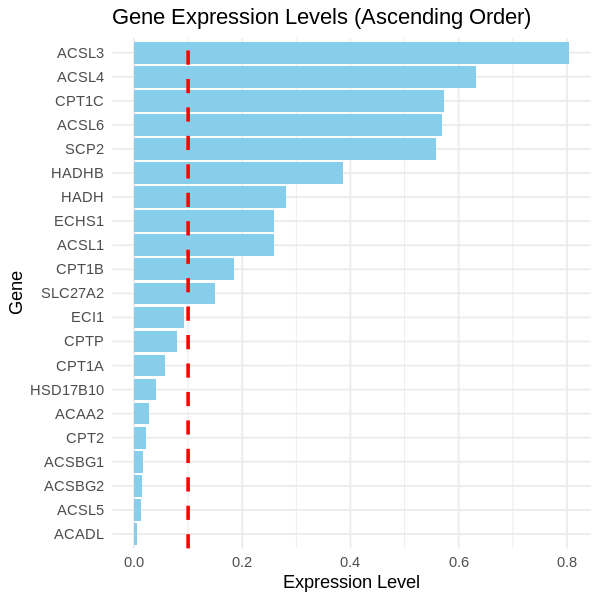

In [104]:
plot

In [102]:
paths$V1[(grepl('oxidation', paths$V1))][1]

[1] "fatty acid &beta;-oxidation Homo sapiens FAO-PWY"

In [36]:
c('creatine')%in%paths$V1[1]

[1] FALSE

In [ ]:
all_da

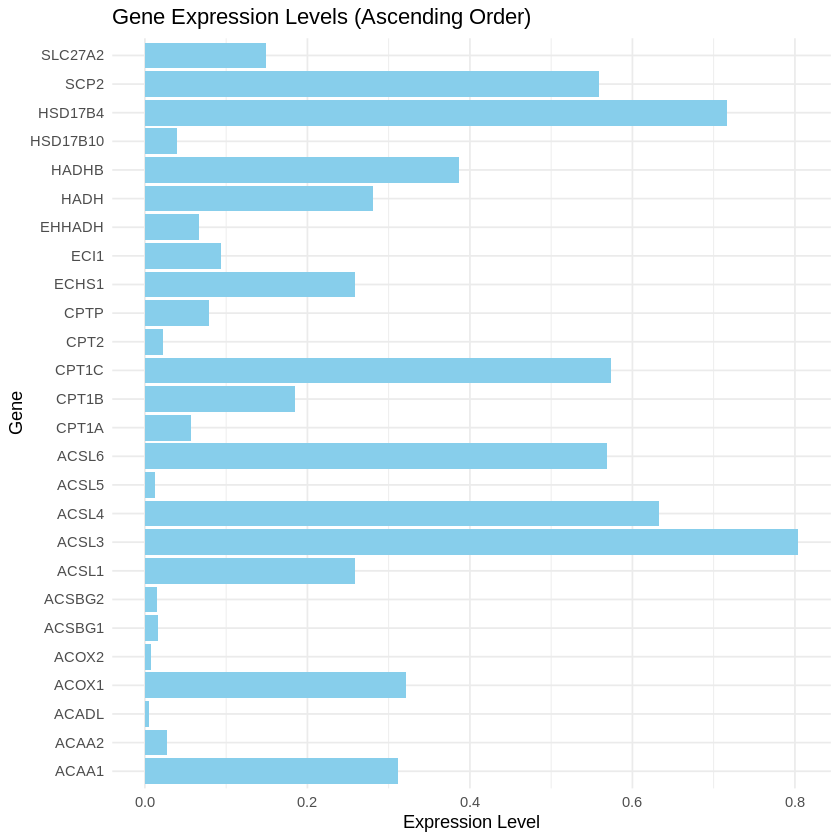

In [81]:
plot

In [65]:
x[,'Ex']

SLC27A2       ACSL3        ECI1       ACSL1     HSD17B4       ACSL6 
0.149116961 0.804041510 0.093064217 0.258247251 0.716023230 0.568715190 
      ACSL5      EHHADH       ACSL4       ECHS1    HSD17B10       ACOX2 
0.012971867 0.066073214 0.632503451 0.258842291 0.039939068 0.007973533 
      HADHB       ACOX1       ACADL        SCP2      ACSBG2      ACSBG1 
0.386823440 0.321940306 0.005093540 0.558742324 0.014304756 0.016637311 
       HADH       ACAA2       ACAA1 
0.280430333 0.027609844 0.311967439

In [56]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




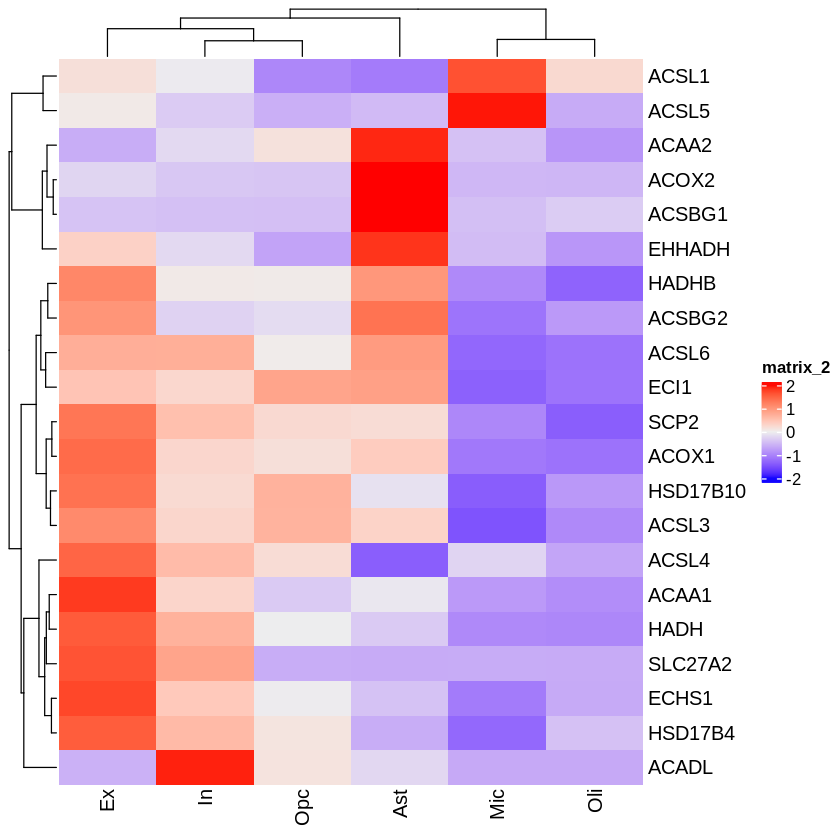

In [60]:
Heatmap(t(scale(t(x))))

In [50]:
all_data$av_logcounts_by_celltype[genes,]

ERROR: Error in all_data$av_logcounts_by_celltype[genes, ]: subscript out of bounds


In [6]:
df = degs$Ex$res

In [32]:
dim(df)

[1] 10458     6

In [29]:
temp = df[startsWith(row.names(df), 'KCN'),]
temp[temp$P.Value<0.05,]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KCNK4,-0.2725285,3.460249,-2.749924,0.01044039,0.5119078,-2.811973
KCNN3,-0.2481499,5.193155,-2.549595,0.01669391,0.5139521,-3.019734
KCNIP3,-0.3502985,5.582259,-2.318962,0.02810176,0.5383050,-3.406514
KCNN1,-0.1668560,4.454870,-2.192141,0.03705315,0.5622292,-3.594725


In [36]:
temp = df[startsWith(row.names(df), 'PCYT'),]
#temp[temp$P.Value<0.05,]
temp

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PCYT1B,-0.14283709,3.562251,-1.335649,0.1926731,0.6949000,-4.618348
PCYT1A,0.08155302,5.464843,1.323989,0.1964660,0.6972875,-4.774621
PCYT2,0.11750291,3.502218,1.264534,0.2167081,0.7125251,-4.664977


In [23]:
temp

logFC,AveExpr,t,P.Value,adj.P.Val,B
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [9]:
row.names(df)

[1] "MXD1"          "CFAP53"        "USH2A"         "LRBA"         
    [5] "HMGN5"         "ZIM2"          "ADAMTS8"       "PTDSS1"       
    [9] "C19orf44"      "HELB"          "GRM2"          "UNC13B"       
   [13] "RECQL"         "ZNF727"        "MAGEC3"        "CASP9"        
   [17] "GLIS1"         "TUBGCP5"       "MTHFS"         "ESR2"         
   [21] "SLC38A10"      "DCDC1"         "TMA16"         "MYPOP"        
   [25] "TLK2"          "PDHX"          "FBXO2"         "MYO1E"        
   [29] "LMO3"          "ABCC5"         "IER5L"         "OSGIN2"       
   [33] "ZNF528"        "LRP2BP"        "RNASEH2B"      "KBTBD2"       
   [37] "ENPP5"         "LZTFL1"        "TRMT1L"        "AK5"          
   [41] "RND1"          "PSMD6"         "ADAMTSL3"      "CHGB"         
   [45] "COX7A2"        "PPP1R14C"      "SLC17A7"       "SMARCE1"      
   [49] "HEATR3"        "CCZ1B"         "OGFR"          "AKR1B1"       
   [53] "DNASE1"        "ZBED5"         "THOC2"         "PPARD"        
   [57] "RFTN1"         "TFCP2"         "TMEM128"       "RBL2"         
   [61] "MRPS6"         "CWC25"         "CAMK2N2"       "WWTR1"        
   [65] "PGAP2"         "AP3M2"         "KIF27"         "NSFL1C"       
   [69] "DNAJA1"        "CPT1B"         "RASA1"         "NPTXR"        
   [73] "SCAMP3"        "NGDN"          "MLF1"          "SHROOM2"      
   [77] "PSIP1"         "SDCBP2"        "SLC4A10"       "MFSD8"        
   [81] "MRPL32"        "H2AFZ"         "PDE8A"         "STAT6"        
   [85] "RNF112"        "PDCD10"        "TET1"          "CCKBR"        
   [89] "ICE1"          "TSHZ1"         "NELFB"         "CTR9"         
   [93] "CREB3L2"       "MBNL1"         "WNT2B"         "LMAN2L"       
   [97] "PHLDA1"        "KIAA0895"      "GRASP"         "MARCH4"       
  [101] "TLCD5"         "METAP1D"       "PLPP7"         "VPS13D"       
  [105] "PHB2"          "JAK2"          "CDC7"          "ZNF621"       
  [109] "MANBAL"        "CORIN"         "C3orf38"       "PPP1R11"      
  [113] "LRRC17"        "SEMA4B"        "WDR35"         "AIMP2"        
  [117] "CEP41"         "DHFR"          "TRA2B"         "FAM227B"      
  [121] "PTBP2"         "ZNF800"        "PDS5B"         "NIPA2"        
  [125] "RASL10A"       "ASB2"          "TTC26"         "HAUS3"        
  [129] "DIS3"          "COPS2"         "ETV3"          "FBXO31"       
  [133] "SATB2"         "ENKUR"         "STXBP5"        "SLC25A25"     
  [137] "HSPA14.1"      "ZNF720"        "CLIC5"         "TBC1D15"      
  [141] "DNAH5"         "KYAT3"         "PYROXD1"       "PSMD14"       
  [145] "LRRK2"         "PCDH1"         "FAM160A2"      "ZNF334"       
  [149] "MYLK4"         "FAM135A"       "FNDC4"         "ADAMTS17"     
  [153] "SLC35B3"       "SCFD2"         "ACBD3"         "PTN"          
  [157] "ENTPD5"        "MLYCD"         "TRIM54"        "RGS5"         
  [161] "LSM8"          "PSMD5"         "SHQ1"          "ITGAV"        
  [165] "MGAT3"         "HNRNPLL"       "FBXL17"        "FBXO46"       
  [169] "PSMB7"         "MANBA"         "GSTP1"         "UBR1"         
  [173] "SLC6A11"       "SENP8"         "CETN3"         "CSRNP2"       
  [177] "GABPB2"        "TUBGCP3"       "WDR46"         "ARHGEF37"     
  [181] "XPNPEP1"       "MRPS35"        "TYK2"          "INTS14"       
  [185] "UFL1"          "MRPL39"        "CDC123"        "AMPH"         
  [189] "ANKRD30BL"     "DMTN"          "SNTB2"         "NFKBID"       
  [193] "LMBR1"         "RAPGEF5"       "CRACR2A"       "NADK"         
  [197] "MID1"          "NDUFV2"        "ATF7IP2"       "ZC3H4"        
  [201] "SH3D19"        "GANC"          "PDE1B"         "ZNF618"       
  [205] "LUC7L"         "FBN1"          "SLC16A14"      "ZFP91"        
  [209] "PDCD5"         "KCNK4"         "RUSC2"         "FAIM"         
  [213] "SNX9"          "AK3"           "KBTBD11"       "PER2"         
  [217] "USP3"          "DLGAP3"        "VAMP1"         "SRPK1"        
  [221] "ZBTB40"        "NFKBIA"        "NMR